In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression

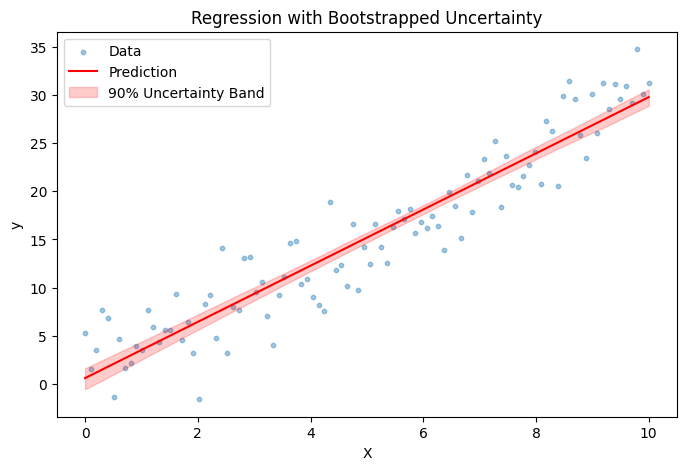

In [3]:
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + np.random.normal(scale=3, size=100)

model = LinearRegression()

n_boot = 200
preds = []

for i in range(n_boot):
    X_bs, y_bs = resample(X, y)
    model.fit(X_bs, y_bs)
    preds.append(model.predict(X))

preds = np.array(preds)

y_pred = preds.mean(axis=0)
lower = np.percentile(preds, 5, axis=0)
upper = np.percentile(preds, 95, axis=0)

plt.figure(figsize=(8,5))
plt.scatter(X, y, s=10, alpha=0.4, label="Data")
plt.plot(X, y_pred, color="red", label="Prediction")
plt.fill_between(X.squeeze(), lower, upper, color='red', alpha=0.2,
                 label="90% Uncertainty Band")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regression with Bootstrapped Uncertainty")
plt.show()